## Explore Fantasy Football Data

This notebook will explore the data scraped from the ESPN Raytonia Beach Fantasy Football League in the following ways:

1. Check numerical variables for any data quality issues
2. Plot histograms to check variable distribution
3. Plot heatmaps to check variable correlation
4. Plot scatterplots to check relationship between target variable (actual_points) and feature matrix variables (depends on position group).

In [1]:
# import needed packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# set pandas display options
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',100)
pd.set_option('display.width',1000)

# adjust width of notebook cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# prints multiple outputs within same cell display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### <font color='red'>Set user defined fields in cells with red titles</font>

In [71]:
# set print flag to True if you want to output within this notebook or set print flag to False to save output to csv
print_flag = False

# if print flag is False set output directory below
output_dir = 'data_exploration'

# create directory if it doesn't exist
if not os.path.exists(output_dir): 
    os.makedirs(output_dir)

#### Read in Data

In [12]:
# read csv
rbwrte_df = pd.read_csv("rbwrte_feature_matrix.csv")

# create list of player specific columns
player_columns = ['year'
                 ,'week'
                 ,'player'
                 ,'short_name'
                 ,'position_name'
                 ,'pro_team'
                 ,'pro_team_abv']

# convert columns to string
rbwrte_df[player_columns[2:]] = rbwrte_df[player_columns[2:]].astype('string')
rbwrte_df.info()
rbwrte_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7615 entries, 0 to 7614
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 7615 non-null   int64  
 1   week                 7615 non-null   int64  
 2   player               7615 non-null   string 
 3   short_name           7615 non-null   string 
 4   position_name        7615 non-null   string 
 5   pro_team             7615 non-null   string 
 6   pro_team_abv         7615 non-null   string 
 7   rush_att             7615 non-null   float64
 8   rush_yrd             7615 non-null   float64
 9   rush_td              7615 non-null   float64
 10  rush_2pt_con         7615 non-null   float64
 11  rec_tar              7615 non-null   float64
 12  receptions           7615 non-null   float64
 13  rec_yrd              7615 non-null   float64
 14  rec_td               7615 non-null   float64
 15  rec_2pt_con          7615 non-null   f

,year,week,player,short_name,position_name,pro_team,pro_team_abv,rush_att,rush_yrd,rush_td,rush_2pt_con,rec_tar,receptions,rec_yrd,rec_td,rec_2pt_con,fum_lost,yrd_per_rush,rush_share,total_off_share,target_share,yrd_per_catch,yards_after_catch,air_yards_ind,compl_rec_air_yrds,racr,adot,wopr,rush_5_yrd_ff,rush_yrd_100_199_ff,rush_yrd_200+_ff,rush_td_ff,rush_50_yrd_td_ff,rush_2pt_con_ff,receptions_ff,rec_5_yrd_ff,rec_yrd_100_199_ff,rec_yrd_200+_ff,rec_td_ff,rec_50_yrd_td_ff,rec_2pt_con_ff_ff,fum_lost_ff,actual_points
0,2018,1,David Johnson,D.Johnson,RB,Arizona Cardinals,ARI,9.0,37.0,1.0,0.0,9.0,5.0,30.0,0.0,0.0,0.0,4.111111,0.600000,0.28,0.257143,6.000000,20.0,7.0,10.0,4.285714,0.777778,0.409272,4.2,0.0,0.0,6.0,0.0,0.0,2.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,15.8
1,2018,1,Melvin Gordon,M.Gordon,RB,Los Angeles Chargers,LAC,15.0,64.0,0.0,1.0,13.0,9.0,102.0,0.0,0.0,0.0,4.000000,0.695652,0.32,0.250000,11.333333,119.0,-16.0,-17.0,-6.375000,-1.230769,0.351812,7.2,0.0,0.0,0.0,0.0,2.0,3.6,12.0,3.0,0.0,0.0,0.0,0.0,0.0,27.8
2,2018,1,Rob Gronkowski,R.Gronkowski,TE,New Engalnd Patriots,NE,0.0,0.0,0.0,0.0,8.0,7.0,123.0,1.0,0.0,1.0,0.000000,0.000000,0.00,0.205128,17.571429,21.0,107.0,102.0,1.149533,13.375000,0.541755,0.0,0.0,0.0,0.0,0.0,0.0,2.8,14.4,3.0,0.0,6.0,0.0,0.0,-2.0,24.2


In [72]:
# read csv
qb_df = pd.read_csv("qb_feature_matrix.csv")

# convert columns to string
qb_df[player_columns[2:]] = qb_df[player_columns[2:]].astype('string')
qb_df.info()
qb_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1148 non-null   int64  
 1   week                 1148 non-null   int64  
 2   player               1148 non-null   string 
 3   short_name           1148 non-null   string 
 4   position_name        1148 non-null   string 
 5   pro_team             1148 non-null   string 
 6   pro_team_abv         1148 non-null   string 
 7   pass_comp            1148 non-null   float64
 8   pass_incomp          1148 non-null   float64
 9   pass_yrd             1148 non-null   float64
 10  air_yards            1148 non-null   float64
 11  pass_td              1148 non-null   float64
 12  rdz_td               1148 non-null   float64
 13  pass_2pt_con         1148 non-null   float64
 14  pass_int             1148 non-null   float64
 15  rush_att             1148 non-null   f

,year,week,player,short_name,position_name,pro_team,pro_team_abv,pass_comp,pass_incomp,pass_yrd,air_yards,pass_td,rdz_td,pass_2pt_con,pass_int,rush_att,rush_yrd,rush_td,rush_2pt_con,fum_lost,compl_rate,pass_yrd_per_att,air_yrd_per_att,adj_net_yrd_per_att,comp_air_yard,td_to_att_ratio,int_to_td_ratio,total_to,yrd_per_rush,rush_share,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,qb_hit,sack,ep,epa,air_epa,comp_air_epa,qb_epa,air_wpa,comp_air_wpa,pass_comp_ff,pass_incomp_ff,pass_5_yrd_ff,pass_yrd_300_399_ff,pass_yrd_400+_ff,pass_td_ff,pass_50_yrd_td_ff,pass_2pt_con_ff,pass_int_ff,rush_5_yrd_ff,rush_yrd_100_199_ff,rush_yrd_200+_ff,rush_td_ff,rush_50_yrd_td_ff,rush_2pt_con_ff,fum_lost_ff,actual_points
0,2018,1,Matthew Stafford,M.Stafford,QB,Detroit Lions,DET,27.0,19.0,286.0,354.0,1.0,0.0,0.0,4.0,1.0,6.0,0.0,0.0,0.0,0.642857,6.809524,8.428571,3.476190,142.0,0.047619,2.0,5.0,6.000000,0.066667,42.0,27.0,46.0,0.0,0.0,0.0,4.0,0.0,114.416126,-15.735498,26.638698,-0.097134,-15.735498,0.008817,0.008817,10.8,-3.8,5.7,0.0,0.0,6.0,0.0,0.0,-8.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,11.3
1,2018,1,Ben Roethlisberger,B.Roethlisberger,QB,Pittsburgh Steelers,PIT,23.0,18.0,335.0,382.0,1.0,0.0,0.0,3.0,3.0,16.0,0.0,0.0,2.0,0.605263,8.236842,10.052632,5.238095,100.0,0.026316,3.0,5.0,5.333333,0.085714,42.0,4.0,45.0,0.0,0.0,0.0,5.0,4.0,65.470792,-6.626383,17.275068,3.820365,-6.626383,1.816574,0.917498,9.2,-3.6,6.7,3.0,0.0,6.0,0.0,0.0,-6.0,1.8,0.0,0.0,0.0,0.0,0.0,-4.0,13.1
2,2018,1,Matt Ryan,M.Ryan,QB,Atlanta Falcons,ATL,21.0,22.0,251.0,380.0,0.0,0.0,0.0,1.0,2.0,8.0,0.0,0.0,0.0,0.500000,5.357143,9.047619,4.478261,133.0,0.000000,0.0,1.0,4.000000,0.111111,34.0,5.0,47.0,0.0,0.0,0.0,13.0,4.0,96.311492,-12.027826,35.290724,7.462745,-12.027826,-0.189742,0.200121,8.4,-4.4,5.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,7.6


In [73]:
# read csv
def_df = pd.read_csv("def_feature_matrix.csv")

# convert columns to string
def_df[player_columns[2:]] = def_df[player_columns[2:]].astype('string')
def_df.info()
def_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 94 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       841 non-null    int64  
 1   week                       841 non-null    int64  
 2   player                     841 non-null    string 
 3   short_name                 841 non-null    string 
 4   position_name              841 non-null    string 
 5   pro_team                   841 non-null    string 
 6   pro_team_abv               841 non-null    string 
 7   def_pts_alw                841 non-null    float64
 8   def_tot_yrd_alw            841 non-null    float64
 9   def_st_int                 841 non-null    float64
 10  def_st_fum                 841 non-null    float64
 11  def_st_sack                841 non-null    float64
 12  def_st_safety              841 non-null    float64
 13  def_st_blk_kick            841 non-null    float64

,year,week,player,short_name,position_name,pro_team,pro_team_abv,def_pts_alw,def_tot_yrd_alw,def_st_int,def_st_fum,def_st_sack,def_st_safety,def_st_blk_kick,def_st_int_td,def_st_fum_ret_td,def_st_blk_td,def_st_kick_ret_td,def_st_punt_ret_td,rush_att_agst,rush_yrd_agst,rush_yrd_gained_agst,rush_td_agst,inc_pass_agst,comp_pass_agst,pass_yrd_agst,air_yrd_agst,yac_agst,pass_yrd_gained_agst,pass_td_agst,plays_agst,rsh_yrd_per_att_agst,compl_perc_agst,pass_yrd_per_att_agst,yrd_per_play_agst,compl_air_yrds_agst,racr_agst,adot_agst,net_yrd_per_att_agst,adj_net_yrd_per_att_agst,pass_td_to_att_ratio_agst,rdz_td_agst,td_rate_agst,int_to_td_ratio_agst,total_to,sack_yrd,num_penalty,penalty_yards,tot_drives_agst,drv_end_scr,drv_end_scr_perc,drv_end_to,drv_end_to_perc,shotgun_agst,no_huddle_agst,qb_drop_agst,qb_kneel_agst,qb_spike_agst,qb_scramble_agst,qb_hit_agst,ep_agst,epa_agst,air_epa_agst,comp_air_epa_agst,qb_epa_agst,air_wpa_agst,comp_air_wpa_agst,def_st_0_pts_alw_ff,def_st_1_6_pts_alw_ff,def_st_7_13_pts_alw_ff,def_st_14_17_pts_alw_ff,def_st_22_27_pts_alw_ff,def_st_28_34_pts_alw_ff,def_st_35_45_pts_alw_ff,def_st_46+_pts_alw_ff,def_st_0_99_yrd_alw_ff,def_st_100_199_yrd_alw_ff,def_st_200_299_yrd_alw_ff,def_st_350_399_yrd_alw,def_st_400_449_yrd_alw_ff,def_st_450_499_yrd_alw_ff,def_st_500_549_yrd_alw_ff,def_st_550+_yrd_alw_ff,def_st_int_ff,def_st_fum_ff,def_st_sack_ff,def_st_blk_kick_ff,def_st_safety_ff,def_st_int_td_ff,def_st_fum_ret_td_ff,def_st_blk_td_ff,def_st_kick_ret_td_ff,def_st_punt_ret_td_ff,actual_points
0,2018,1,Jaguars D/ST,J.D/ST,DEF,Jacksonville Jaguars,JAX,15.0,324.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.0,114.0,114.0,1.0,13.0,23.0,224.0,249.0,86.0,210.0,1.0,63.0,4.750000,0.638889,5.833333,5.142857,124.0,0.843373,6.916667,5.894737,5.236842,0.027778,0.0,0.031746,1.0,1.0,-14.0,5.0,73.0,12.0,4.0,0.333333,1.0,0.083333,33.0,5.0,39.0,0.0,0.0,0.0,6.0,49.355886,-11.798196,5.400742,-2.863654,-11.798196,0.087749,0.086177,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,21.0
1,2018,1,Ravens D/ST,R.D/ST,DEF,Baltimore Ravens,BAL,3.0,153.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,83.0,83.0,0.0,20.0,11.0,98.0,368.0,33.0,70.0,0.0,61.0,3.772727,0.354839,2.258065,2.508197,37.0,0.190217,11.870968,2.648649,0.216216,0.000000,0.0,0.000000,0.0,2.0,-28.0,4.0,38.0,15.0,1.0,0.066667,2.0,0.133333,39.0,11.0,39.0,0.0,0.0,0.0,9.0,31.496089,-27.864169,26.181205,1.746639,-27.864169,-0.004956,-0.004946,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
2,2018,1,Vikings D/ST,V.D/ST,DEF,Minnesota Vikings,MIN,16.0,327.0,3.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.0,90.0,90.0,0.0,15.0,15.0,261.0,368.0,144.0,237.0,2.0,61.0,3.600000,0.500000,7.900000,5.360656,93.0,0.644022,12.266667,7.909091,5.030303,0.066667,0.0,0.032787,1.5,3.0,-24.0,4.0,37.0,12.0,4.0,0.333333,4.0,0.333333,26.0,4.0,36.0,0.0,0.0,0.0,8.0,71.477030,-13.548580,35.605712,7.101346,-13.548580,0.077075,0.087416,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,25.0


In [74]:
# read csv
kr_df = pd.read_csv("kr_feature_matrix.csv")

# convert columns to string
kr_df[player_columns[2:]] = kr_df[player_columns[2:]].astype('string')
kr_df.info()
kr_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              572 non-null    int64  
 1   week              572 non-null    int64  
 2   player            572 non-null    string 
 3   short_name        572 non-null    string 
 4   position_name     572 non-null    string 
 5   pro_team          572 non-null    string 
 6   pro_team_abv      572 non-null    string 
 7   pat_con           572 non-null    float64
 8   pat_att           572 non-null    float64
 9   fg_con            572 non-null    float64
 10  fg_att            572 non-null    float64
 11  pat_perc          572 non-null    float64
 12  fg_perc           572 non-null    float64
 13  kick_perc         572 non-null    float64
 14  total_plays       572 non-null    float64
 15  total_yards       572 non-null    float64
 16  total_scores      572 non-null    float64
 1

,year,week,player,short_name,position_name,pro_team,pro_team_abv,pat_con,pat_att,fg_con,fg_att,pat_perc,fg_perc,kick_perc,total_plays,total_yards,total_scores,total_scores_rz,pat_made_ff,pat_miss_ff,fg_made_0_39_ff,fg_miss_0_39_ff,fg_made_40_49_ff,fg_miss_40_49_ff,fg_made_50_59_ff,actual_points
0,2018,1,Chris Boswell,C.Boswell,KR,Pittsburgh Steelers,PIT,3.0,3.0,0.0,1.0,1.0,0.000000,0.75,80.0,472.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,-1.0,0.0,2.0
1,2018,1,Harrison Butker,H.Butker,KR,Kansas City Chiefs,KC,5.0,5.0,1.0,1.0,1.0,1.000000,1.00,55.0,362.0,5.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,9.0
2,2018,1,Matt Prater,M.Prater,KR,Detroit Lions,DET,2.0,2.0,1.0,3.0,1.0,0.333333,0.60,67.0,339.0,4.0,1.0,2.0,0.0,3.0,0.0,0.0,-1.0,0.0,4.0


## Explore Numerical Data

In [75]:
# create function to explore numerical data
def explore_num_data(data, n):
    '''
    Function to explore numerical data
    
    param data: pandas dataframe
    param n: integer to determine the number of first and last values to return (when sorted) for each numerical variable
    
    returns: for each numerical variable a pandas dataframe which includes row count, number of distinct values, 5-number
             summary, mean, standard deviation, sum, percentage null, percentage zero, percentage positive, and percentage
             negative
             
             for each numerical variable a pandas dataframe which include the most frequent values, the first n values,
             and the last n values
    '''
    
    # create list of numerical columns
    columns = [i for i in (data.select_dtypes(include=['float64', 'int64']).columns)]
    
    # select numerical columns within dataframe
    data = data[columns]
    
    # call describe function to calculate count, mean, std, and 5-number summary
    describe_df = data.describe()
    
    # create list of number of distinct values within each numerical column
    dist_num = [len(data[i].dropna().unique()) for i in columns]
    
    # create list of the sum of all values within each numerical column
    total_sum = [data[i].sum() for i in columns]
    
    # calculate total number of rows
    total_count = len(data)
    
    # calculate percentage null for each numerical column
    null_perc = [100.0 * data[i].isna().sum() / total_count for i in columns]
    
    # calculate percentage zero for each numerical column
    zero_perc = [100.0 * len(data.loc[data[i] == 0, i]) / total_count for i in columns]
    
    # calculate percentage positive for each numerical column
    pos_perc = [100.0 * len(data.loc[data[i] > 0, i]) / total_count for i in columns]
    
    # calculate percentage negative for each numerical column
    neg_perc = [100.0 * len(data.loc[data[i] < 0, i]) / total_count for i in columns]
    
    # create temporary dataframe for statistics created above
    temp_df = pd.DataFrame({'dist_num': dist_num
                           ,'total_sum': total_sum
                           ,'null_perc': null_perc
                           ,'zero_perc': zero_perc
                           ,'pos_perc': pos_perc
                           ,'neg_perc': neg_perc
                           }).transpose()
    
    # set columns
    temp_df.columns = columns
    
    # concatenate describe_df and temp_df
    df = pd.concat([describe_df, temp_df], sort = False)
    
    # set index name
    df.index.set_names('summary', inplace = True)
    
    # transpose dataframe
    df = df.transpose()
    
    # reorder dataframe
    df = df[['count'
            ,'dist_num'
            ,'min'
            ,'25%'
            ,'50%'
            ,'75%'
            ,'max'
            ,'mean'
            ,'std'
            ,'total_sum'
            ,'null_perc'
            ,'zero_perc'
            ,'pos_perc'
            ,'neg_perc'
            ]]
    
    # rename count column
    df.rename(columns={'count':'row_count'}, inplace=True)
    
    # calculate most frequent values within each numerical column
    freq = []
    for i in columns:
        temp_freq = data.groupby(i).agg(count = (i, 'count')).sort_values('count', ascending = False).reset_index().head(n)
        temp_freq['freq'] = temp_freq['count'] / total_count
        freq.append(temp_freq)
    
    # calculate the first n values within each numerical column when sorted
    first_values = []
    for j in columns:
        temp_first_values = data.groupby(j).agg(count = (j, 'count')).sort_values(j, ascending = True).reset_index().head(n)
        temp_first_values['freq'] = temp_first_values['count'] / total_count
        first_values.append(temp_first_values)
    
    # calculate the last n values within each numerical column when sorted
    last_values = []
    for k in columns:
        temp_last_values = data.groupby(k).agg(count = (k, 'count')).sort_values(k, ascending = False).reset_index().head(n)
        temp_last_values['freq'] = temp_last_values['count'] / total_count
        last_values.append(temp_last_values)
    
    return df, freq, first_values, last_values

#### Review the following for each numerical variable in the running backs, wide receivers, and tight ends dataframe:

* Row count
* Number of distinct values
* 5-number summary
* Mean
* Standard Deviation
* Sum of all values
* Percentage null
* Percentage zero
* Percentage positive
* Percentage negative

In [76]:
# run explore_num_data function
rbwrte_num_data, rbwrte_num_freq, rbwrte_num_first_values, rbwrte_num_last_values = explore_num_data(rbwrte_df, 5)

# print or save to csv
if print_flag:
    rbwrte_num_data
else:
    rbwrte_num_data.to_csv(output_dir + "/rbwrte_num_data.csv")

#### Reveiw the following for each numerical variable in the running backs, wide receivers, and tight ends dataframe:

* Top n most frequent values
* First n values when sorted
* Last n values when sorted

In [77]:
# print or save to csv
if print_flag:
    for i in range(0, len(rbwrte_num_freq)):
        rbwrte_num_freq[i]
else:
    rbwrte_num_freq_df = pd.DataFrame({'rbwrte_num_freq': rbwrte_num_freq}).to_csv(output_dir + "/rbwrte_num_freq.csv", index = False)

In [78]:
# print or save to csv
if print_flag:
    for j in range(0, len(rbwrte_num_first_values)):
        rbwrte_num_first_values[j]
else:
    rbwrte_num_first_values_df = pd.DataFrame({'rbwrte_num_first_values': rbwrte_num_first_values}).to_csv(output_dir + "/rbwrte_num_first_values.csv", index = False)

In [79]:
# print or save to csv
if print_flag:
    for k in range(0, len(rbwrte_num_last_values)):
        rbwrte_num_last_values[k]
else:
    rbwrte_num_last_values_df = pd.DataFrame({'rbwrte_num_last_values': rbwrte_num_last_values}).to_csv(output_dir + "/rbwrte_num_last_values.csv", index = False)

#### Review the following for each numerical variable in the quarterbacks dataframe:

* Row count
* Number of distinct values
* 5-number summary
* Mean
* Standard Deviation
* Sum of all values
* Percentage null
* Percentage zero
* Percentage positive
* Percentage negative

In [80]:
# run explore_num_data function
qb_num_data, qb_num_freq, qb_num_first_values, qb_num_last_values = explore_num_data(qb_df, 5)

# print or save to csv
if print_flag:
    qb_num_data
else:
    qb_num_data.to_csv(output_dir + "/qb_num_data.csv")

#### Reveiw the following for each numerical variable in the quarterbacks dataframe:

* Top n most frequent values
* First n values when sorted
* Last n values when sorted

In [81]:
# print or save to csv
if print_flag:
    for i in range(0, len(qb_num_freq)):
        qb_num_freq[i]
else:
    qb_num_freq_df = pd.DataFrame({'qb_num_freq': qb_num_freq}).to_csv(output_dir + "/qb_num_freq.csv", index = False)

In [82]:
# print or save to csv
if print_flag:
    for j in range(0, len(qb_num_first_values)):
        qb_num_first_values[j]
else:
    qb_num_first_values_df = pd.DataFrame({'qb_num_first_values': qb_num_first_values}).to_csv(output_dir + "/qb_num_first_values.csv", index = False)

In [83]:
# print or save to csv
if print_flag:
    for k in range(0, len(qb_num_last_values)):
        qb_num_last_values[k]
else:
    qb_num_last_values_df = pd.DataFrame({'qb_num_last_values': qb_num_last_values}).to_csv(output_dir + "/qb_num_last_values.csv", index = False)

#### Review the following for each numerical variable in the defenses dataframe:

* Row count
* Number of distinct values
* 5-number summary
* Mean
* Standard Deviation
* Sum of all values
* Percentage null
* Percentage zero
* Percentage positive
* Percentage negative

In [84]:
# run explore_num_data function
def_num_data, def_num_freq, def_num_first_values, def_num_last_values = explore_num_data(def_df, 5)

# print or save to csv
if print_flag:
    def_num_data
else:
    def_num_data.to_csv(output_dir + "/def_num_data.csv")

#### Reveiw the following for each numerical variable in the defenses dataframe:

* Top n most frequent values
* First n values when sorted
* Last n values when sorted

In [85]:
# print or save to csv   
if print_flag:
    for i in range(0, len(def_num_freq)):
        def_num_freq[i]
else:
    def_num_freq_df = pd.DataFrame({'def_num_freq': def_num_freq}).to_csv(output_dir + "/def_num_freq.csv", index = False)

In [86]:
# print or save to csv   
if print_flag:
    for j in range(0, len(def_num_first_values)):
        def_num_first_values[j]
else:
    def_num_first_values_df = pd.DataFrame({'def_num_first_values': def_num_first_values}).to_csv(output_dir + "/def_num_first_values.csv", index = False)

In [87]:
# print or save to csv
if print_flag:
    for k in range(0, len(def_num_last_values)):
        def_num_last_values[k]
else:
    def_num_last_values_df = pd.DataFrame({'def_num_last_values': def_num_last_values}).to_csv(output_dir + "/def_num_last_values.csv", index = False)

#### Review the following for each numerical variable inthe kickers dataframe:

* Row count
* Number of distinct values
* 5-number summary
* Mean
* Standard Deviation
* Sum of all values
* Percentage null
* Percentage zero
* Percentage positive
* Percentage negative

In [88]:
# run explore_num_data function
kick_num_data, kick_num_freq, kick_num_first_values, kick_num_last_values = explore_num_data(kr_df, 5)

# print or save to csv
if print_flag:
    kick_num_data
else:
    kick_num_data.to_csv(output_dir + "/kick_num_data.csv")

#### Reveiw the following for each numerical variable in the kickers dataframe:

* Top n most frequent values
* First n values when sorted
* Last n values when sorted

In [89]:
# print or save to csv
if print_flag:
    for i in range(0, len(kick_num_freq)):
        kick_num_freq[i]
else:
    kick_num_freq_df = pd.DataFrame({'kick_num_freq': kick_num_freq}).to_csv(output_dir + "/kick_num_freq.csv", index = False)

In [90]:
# print or save to csv
if print_flag:
    for j in range(0, len(kick_num_first_values)):
        kick_num_first_values[j]
else:
    kick_num_first_values_df = pd.DataFrame({'kick_num_first_values': kick_num_first_values}).to_csv(output_dir + "/kick_num_first_values.csv", index = False)

In [91]:
# print or save to csv
if print_flag:
    for k in range(0, len(kick_num_last_values)):
        kick_num_last_values[k]
else:
    kick_num_last_values_df = pd.DataFrame({'kick_num_last_values': kick_num_last_values}).to_csv(output_dir + "/kick_num_last_values.csv", index = False)

## Explore Categorical Data

In [92]:
# create function to explore categorical data
def explore_cat_data(data, n):
    '''
    Function to explore categorical data
    
    param data: pandas dataframe
    param n: integer to determine the number of first and last values to return (when sorted) for each categorical variable
    
    returns: for each categorical variable a pandas dataframe which includes minimum string length, maximum string length, row count, number of 
             distince values, percent null, and percent empty
             
             for each categorical variable a pandas dataframe which include the most frequent values, the first n values,
             and the last n values
    '''
    
    # create list of categorical columns
    columns = [i for i in (data.select_dtypes(include=['string', 'object', 'category']).columns)]
    
    # select categorical columns within dataframe
    data = data[columns]
    
    # calculate row count
    count_rows = [data[i].dropna().count() for i in columns]
    
    # calculate number of distinct values
    dist_num = [data[i].dropna().value_counts().count() for i in columns]
    
    # calculate total number of rows
    total_count = len(data)
    
    # calculate minimum length for each categorical column
    min_length = [data[i].astype(str).str.len().min() for i in columns]
    
    # calculate maximum length for each categorical column
    max_length = [data[i].astype(str).str.len().max() for i in columns]
    
    # calculate percentage null for each categorical column
    null_perc = [100.0 * data[i].isna().sum() / total_count for i in columns]
    
    # calculate percentage empty for each categorical column
    empty_perc = [100.0 * len(data.loc[data[i] == '', i]) / total_count for i in columns]    
    
    # combine above stats into a pandas dataframe
    df = pd.DataFrame({'row_count': count_rows
                      ,'dist_num': dist_num
                      ,'min_length': min_length
                      ,'max_length': max_length
                      ,'null_perc': null_perc
                      ,'empty_perc': empty_perc
                      }).transpose()
    
    # calculate most frequent values within each categorical column
    freq = []
    for i in columns:
        temp_freq = data.groupby(i).agg(count = (i, 'count')).sort_values('count', ascending = False).reset_index().head(n)
        temp_freq['freq'] = temp_freq['count'] / total_count
        freq.append(temp_freq)
    
    # calculate the first n values within each categorical column when sorted
    first_values = []
    for j in columns:
        temp_first_values = data.groupby(j).agg(count = (j, 'count')).sort_values(j, ascending = True).reset_index().head(n)
        temp_first_values['freq'] = temp_first_values['count'] / total_count
        first_values.append(temp_first_values)
    
    # calculate the last n values within each categorical column when sorted
    last_values = []
    for k in columns:
        temp_last_values = data.groupby(k).agg(count = (k, 'count')).sort_values(k, ascending = False).reset_index().head(n)
        temp_last_values['freq'] = temp_last_values['count'] / total_count
        last_values.append(temp_last_values)
    
    return df, freq, first_values, last_values

#### Review the following for each categorical variable in the running backs, wide receivers, and tight ends dataframe:

* Row count
* Number of distinct values
* Minimum String Length
* Maximum String Length
* Percentage Null
* Percentage Empty

In [93]:
# run explore_num_data function
rbwrte_cat_data, rbwrte_cat_freq, rbwrte_cat_first_values, rbwrte_cat_last_values = explore_cat_data(rbwrte_df, 5)

# print or save to csv
if print_flag:
    rbwrte_cat_data
else:
    rbwrte_cat_data.to_csv(output_dir + "/rbwrte_cat_data.csv")

#### Reveiw the following for each categorical variable in the running backs, wide receivers, and tight ends dataframe:

* Top n most frequent values
* First n values when sorted
* Last n values when sorted

In [94]:
# print or save to csv
if print_flag:
    for i in range(0, len(rbwrte_cat_freq)):
        rbwrte_cat_freq[i]
else:
    rbwrte_cat_freq_df = pd.DataFrame({'rbwrte_cat_freq': rbwrte_cat_freq}).to_csv(output_dir + "/rbwrte_cat_freq.csv", index = False)

In [95]:
# print or save to csv
if print_flag:
    for j in range(0, len(rbwrte_cat_first_values)):
        rbwrte_cat_first_values[j]
else:
    rbwrte_cat_first_values_df = pd.DataFrame({'rbwrte_cat_first_values': rbwrte_cat_first_values}).to_csv(output_dir + "/rbwrte_cat_first_values.csv", index = False)

In [96]:
# print or save to csv
if print_flag:
    for k in range(0, len(rbwrte_cat_last_values)):
        rbwrte_cat_last_values[k]
else:
    rbwrte_cat_last_values_df = pd.DataFrame({'rbwrte_cat_last_values': rbwrte_cat_last_values}).to_csv(output_dir + "/rbwrte_cat_last_values.csv", index = False)

#### Review the following for each categorical variable in the quarterbacks dataframe:

* Row count
* Number of distinct values
* Minimum String Length
* Maximum String Length
* Percentage Null
* Percentage Empty

In [97]:
# run explore_num_data function
qb_cat_data, qb_cat_freq, qb_cat_first_values, qb_cat_last_values = explore_cat_data(qb_df, 5)

# print or save to csv
if print_flag:
    qb_cat_data
else:
    qb_cat_data.to_csv(output_dir + "/qb_cat_data.csv")

#### Reveiw the following for each categorical variable in the quarterbacks dataframe:

* Top n most frequent values
* First n values when sorted
* Last n values when sorted

In [98]:
# print or save to csv
if print_flag:
    for i in range(0, len(qb_cat_freq)):
        qb_cat_freq[i]
else:
    qb_cat_freq_df = pd.DataFrame({'qb_cat_freq': qb_cat_freq}).to_csv(output_dir + "/qb_cat_freq.csv", index = False)

In [99]:
# print or save to csv
if print_flag:
    for j in range(0, len(qb_cat_first_values)):
        qb_cat_first_values[j]
else:
    qb_cat_first_values_df = pd.DataFrame({'qb_cat_first_values': qb_cat_first_values}).to_csv(output_dir + "/qb_cat_first_values.csv", index = False)

In [100]:
# print or save to csv
if print_flag:
    for k in range(0, len(qb_cat_last_values)):
        qb_cat_last_values[k]
else:
    qb_cat_last_values_df = pd.DataFrame({'qb_cat_last_values': qb_cat_last_values}).to_csv(output_dir + "/qb_cat_last_values.csv", index = False)

#### Review the following for each categorical variable in the defenses dataframe:

* Row count
* Number of distinct values
* Minimum String Length
* Maximum String Length
* Percentage Null
* Percentage Empty

In [101]:
# run explore_num_data function
def_cat_data, def_cat_freq, def_cat_first_values, def_cat_last_values = explore_cat_data(def_df, 5)

# print or save to csv
if print_flag:
    def_cat_data
else:
    def_cat_data.to_csv(output_dir + "/def_cat_data.csv")

#### Reveiw the following for each categorical variable in the defenses dataframe:

* Top n most frequent values
* First n values when sorted
* Last n values when sorted

In [102]:
# print or save to csv   
if print_flag:
    for i in range(0, len(def_cat_freq)):
        def_cat_freq[i]
else:
    def_cat_freq_df = pd.DataFrame({'def_cat_freq': def_cat_freq}).to_csv(output_dir + "/def_cat_freq.csv", index = False)

In [103]:
# print or save to csv   
if print_flag:
    for j in range(0, len(def_cat_first_values)):
        def_cat_first_values[j]
else:
    def_cat_first_values_df = pd.DataFrame({'def_cat_first_values': def_cat_first_values}).to_csv(output_dir + "/def_cat_first_values.csv", index = False)

In [104]:
# print or save to csv
if print_flag:
    for k in range(0, len(def_cat_last_values)):
        def_cat_last_values[k]
else:
    def_cat_last_values_df = pd.DataFrame({'def_cat_last_values': def_cat_last_values}).to_csv(output_dir + "/def_cat_last_values.csv", index = False)

#### Review the following for each categorical variable in the kickers dataframe:

* Row count
* Number of distinct values
* Minimum String Length
* Maximum String Length
* Percentage Null
* Percentage Empty

In [105]:
# run explore_num_data function
kick_cat_data, kick_cat_freq, kick_cat_first_values, kick_cat_last_values = explore_cat_data(kr_df, 5)

# print or save to csv
if print_flag:
    kick_cat_data
else:
    kick_cat_data.to_csv(output_dir + "/kick_cat_data.csv")

#### Reveiw the following for each catgorical variable in the kickers dataframe:

* Top n most frequent values
* First n values when sorted
* Last n values when sorted

In [106]:
# print or save to csv
if print_flag:
    for i in range(0, len(kick_cat_freq)):
        kick_cat_freq[i]
else:
    kick_cat_freq_df = pd.DataFrame({'kick_cat_freq': kick_cat_freq}).to_csv(output_dir + "/kick_cat_freq.csv", index = False)

In [107]:
# print or save to csv
if print_flag:
    for j in range(0, len(kick_cat_first_values)):
        kick_cat_first_values[j]
else:
    kick_cat_first_values_df = pd.DataFrame({'kick_cat_first_values': kick_cat_first_values}).to_csv(output_dir + "/kick_cat_first_values.csv", index = False)

In [108]:
# print or save to csv
if print_flag:
    for k in range(0, len(kick_cat_last_values)):
        kick_cat_last_values[k]
else:
    kick_cat_last_values_df = pd.DataFrame({'kick_cat_last_values': kick_cat_last_values}).to_csv(output_dir + "/kick_cat_last_values.csv", index = False)

## Explore Numerical Data Distributions via Histograms

In [111]:
# create function to plot histograms for each numerical variable
def plot_hist(data, file_name):
    # create list of numerical columns
    columns = [i for i in (data.select_dtypes(include=['float64', 'int64']).columns)]
    
    # create pdf object
    pdf_obj = PdfPages(output_dir + '/{}_histograms.pdf'.format(file_name))
    
    # create histogram for each numerical variable
    for col in columns:
        f = plt.figure()
        plt.hist(data['{}'.format(col)].dropna(), bins = 50, color = 'green')
        plt.title('{}'.format(col))
        pdf_obj.savefig(f)
        plt.close()
    pdf_obj.close()

In [112]:
# plot histograms for running backs, wide receivers, and tight ends
plot_hist(rbwrte_df, 'rbwrte')

In [113]:
# plot histograms for quaterbacks
plot_hist(qb_df, 'qb')

In [114]:
# plot histograms for defenses
plot_hist(def_df, 'def')

In [115]:
# plot histograms for kickers
plot_hist(kr_df, 'kr')

## Explore Numerical Data Correlations via Heatmaps

In [123]:
def corr_matrix(data, file_name):
    columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
    
    if len(columns) != 0:
        
        # create a correlation matrix for all numerical columns and export to csv
        corr = data.corr()
        
        # save to cvs
        corr.to_csv(output_dir + '{}_correlation_analysis.csv'.format(file_name), index = True)
        
        # display heatmap if the columns are less than or equal 10, otherwise, the heatmap is too big to easily read within notebook
        if len(columns) <= 10:
            
            # create a correlation matrix with a heatmap and export to png
            fig, ax = plt.subplots(figsize = (8, 8))
            g = sns.heatmap(corr, annot = True, fmt = '.2f', cmap = plt.get_cmap('coolwarm'), cbar = False, ax = ax)
            plt.savefig(output_dir + '{}_correlation_analysis.png'.format(file_name), bbox_inches='tight', pad_inches=0.0)
    else: 
        print("no numerical columns")

In [124]:
corr_matrix(qb_df, 'qb')

In [125]:
corr_matrix(rbwrte_df, 'rbwrte')

In [126]:
corr_matrix(def_df, 'def')

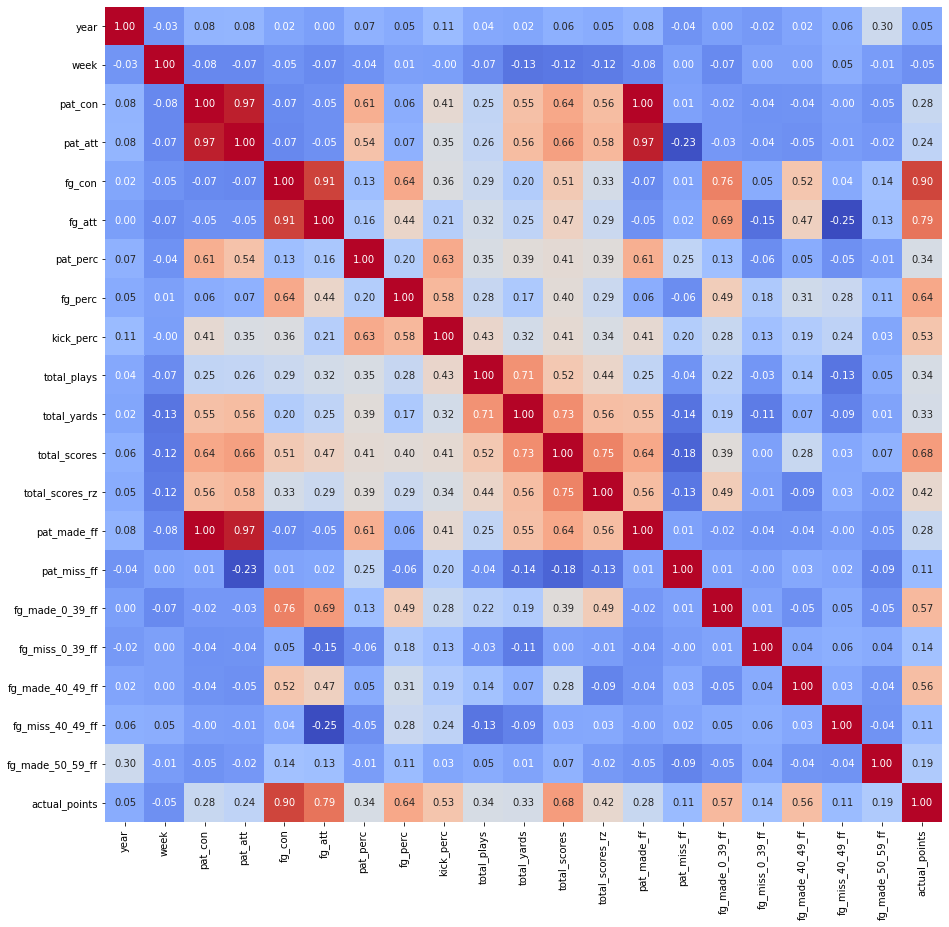

In [127]:
corr_matrix(kr_df, 'kick')